In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from modules.load_data import load_data

In [4]:
# Load modeling results

results = load_data('data/modeling_results.csv')
results

,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,LogisticRegression,0.7483,0.3483,0.6596,0.4559,0.7962
1,RandomForest,0.8469,0.6667,0.0851,0.1509,0.7837
2,CatBoost,0.8741,0.6562,0.4468,0.5316,0.7902
3,LightGBM,0.8605,0.6364,0.2979,0.4058,0.7764


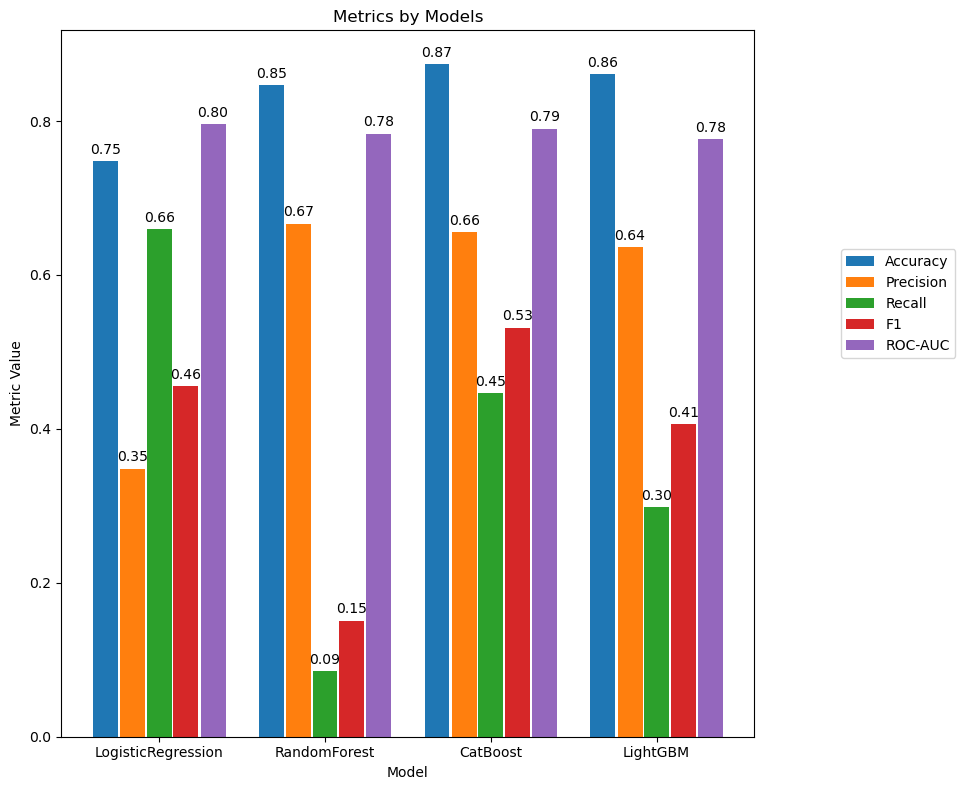

In [7]:
# Draw a plot for metrics by model

# Define the variables and plot params
x = range(4)
models = results['Model']
accuracy = results['Accuracy']
precision = results['Precision']
recall = results['Recall']
f1 = results['F1']
roc_auc = results['ROC-AUC']
bar_width = 0.15
group_offset = 0.01

# Create a function for metrics
def add_bar_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Set the size of the figure
fig, ax = plt.subplots(figsize=(10, 8))

# Set the culumns
accuracy_bars = ax.bar([i - 2.1 * bar_width - group_offset for i in x], accuracy, width=bar_width, label='Accuracy')
precision_bars = ax.bar([i - bar_width - group_offset for i in x], precision, width=bar_width, label='Precision')
recall_bars = ax.bar(x, recall, width=bar_width, label='Recall')
f1_bars = ax.bar([i + bar_width + group_offset for i in x], f1, width=bar_width, label='F1')
roc_auc_bars = ax.bar([i + 2.1 * bar_width + group_offset for i in x], roc_auc, width=bar_width, label='ROC-AUC')

# Add values to the columns
add_bar_labels(ax, accuracy_bars)
add_bar_labels(ax, precision_bars)
add_bar_labels(ax, recall_bars)
add_bar_labels(ax, f1_bars)
add_bar_labels(ax, roc_auc_bars)

# turn it around
ax.set_xticks(x)
ax.set_xticklabels(models, ha='center')

# Sign the names
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.title('Metrics by Models')

# Legend
ax.legend(loc='best', bbox_to_anchor=(0.8, 0.2, 0.5, 0.5))

# Display
plt.tight_layout()
plt.show()